In [ ]:
import os
job_cancel_str="scancel " + os.environ['SLURM_JOBID']
os.system(job_cancel_str)

# Imports

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys, os

sys.path.append(os.path.abspath('..'))

In [48]:
from hit_finding.constants import *
from hit_finding.metrics import *

In [49]:
from learning_tabular.constants import CHANNELS, FAMILIES, LABEL_FIELD
from learning_tabular.preprocessing import load_plate_csv, list_columns

In [10]:
# from os import chdir, scandir, makedirs
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
# import seaborn as sns


# from tqdm import tqdm_notebook as tqdm

# import os

# from itertools import cycle
# from multiprocessing import Pool, cpu_count

In [30]:
zscores = extract_scores_from_all(extract_dist_score)

...................................

In [50]:
zscores_norm_before = extract_scores_from_all(extract_dist_score_norm_before)

...................................

In [30]:
zscores_norm_after = extract_scores_from_all(extract_dist_score_norm_after)

...................................

In [59]:
load_pure_zscores(f'{raw_fld}/{plate_csv}', raw=True, inter_channel=True)['Cells_Granularity_10_AGP']

Plate  Metadata_ASSAY_WELL_ROLE  Metadata_broad_sample   Image_Metadata_Well
24792  mock                      DMSO                    a13                   -0.311627
                                                         a14                    2.989592
                                                         b13                   -0.015170
                                                         b14                   -1.051736
                                                         c11                   -0.368148
                                                                                  ...   
       treated                   BRD-K98264372-001-01-8  h06                    0.254231
                                 BRD-K98474331-001-01-3  d03                   -0.530517
                                 BRD-K98969488-001-01-3  l05                   -1.447165
                                 BRD-K99048639-001-01-3  f23                   -0.411531
                                 

In [60]:
load_pure_zscores(f'{raw1to1_fld}/{plate_csv}', raw=True, inter_channel=False)['Cells_Granularity_10_AGP']

Plate  Metadata_ASSAY_WELL_ROLE  Metadata_broad_sample   Image_Metadata_Well
24792  mock                      DMSO                    a13                    0.282001
                                                         a14                    1.743749
                                                         b13                   -0.843979
                                                         b14                   -0.401925
                                                         c11                   -0.383082
                                                                                  ...   
       treated                   BRD-K98264372-001-01-8  h06                    1.187091
                                 BRD-K98474331-001-01-3  d03                   -0.820604
                                 BRD-K98969488-001-01-3  l05                   -0.238501
                                 BRD-K99048639-001-01-3  f23                   -0.433063
                                 

In [ ]:
# define threshold
t = 4

In [119]:
zscores = extract_scores_from_all(extract_score, threshold=t)

...................................

In [119]:
zscores_ctrl = extract_scores_from_all(extract_score, threshold=t, well_type='mock')

...................................

In [ ]:
norm_zscores = {}

for plate_num in zscores.keys():
    scaler = StandardScaler()
    scaler.fit(zscores_ctrl[plate_num])
    
    norm_zscores[plate_num] = pd.DataFrame(scaler.transform(zscores[plate_num]), index=zscores[plate_num].index, columns=zscores[plate_num].columns)
    

In [23]:
{k: j.shape for k, j in zscores.items()}

{24792: (320, 12),
 25912: (320, 12),
 24509: (320, 12),
 24633: (320, 12),
 25987: (319, 12),
 25680: (320, 12),
 25422: (320, 12),
 24517: (320, 12),
 25664: (320, 12),
 25575: (320, 12),
 26674: (320, 12),
 25945: (320, 12),
 24687: (320, 12),
 24752: (320, 12),
 24311: (320, 12),
 26622: (320, 12),
 26641: (320, 12),
 24594: (320, 12),
 25676: (320, 12),
 24774: (320, 12),
 26562: (320, 12),
 25997: (320, 12),
 26640: (320, 12),
 24562: (320, 12),
 25938: (319, 12),
 25708: (320, 12),
 24321: (320, 12),
 24735: (320, 12),
 26786: (320, 12),
 25571: (320, 12),
 26666: (320, 12),
 24294: (319, 12),
 24640: (320, 12),
 25985: (320, 12),
 24661: (320, 12)}

In [12]:
zscores[24321]

AGP_map   DNA_map  \
Plate Metadata_broad_sample  Image_Metadata_Well                        
24321 BRD-A36151937-001-01-2 a12                   0.937652  0.839837   
      BRD-A47633927-001-01-8 a15                   0.881929  0.582093   
      BRD-A68039575-001-02-5 a16                   0.598522  0.537484   
      BRD-A75455249-001-02-0 a17                   1.031867  0.861409   
      BRD-K01555864-001-02-8 a18                   0.635339  0.546753   
...                                                     ...       ...   
      BRD-K78280988-001-02-2 p23                   0.851832  1.083052   
      BRD-K78329127-001-02-9 p24                   1.059006  1.319894   
      BRD-K90382497-001-01-6 a01                  11.697962  6.860699   
      BRD-K92723993-066-02-9 a02                   0.930126  1.323972   
      BRD-K93201660-001-05-7 a11                   0.785494  0.944212   

                                                    ER_map   Mito_map  \
Plate Metadata_broad_sample  Image_Metadata_Well                        
24321 BRD-A36151937-001-01-2 a12                  0.961423   0.939680   
      BRD-A47633927-001-01-8 a15                  0.777813   0.606494   
      BRD-A68039575-001-02-5 a16                  0.803199   0.547693   
      BRD-A75455249-001-02-0 a17                  0.933440   0.903297   
      BRD-K01555864-001-02-8 a18                  0.620405   0.809666   
...                                                    ...        ...   
      BRD-K78280988-001-02-2 p23                  0.917849   1.076831   
      BRD-K78329127-001-02-9 p24                  1.213108   0.980640   
      BRD-K90382497-001-01-6 a01                  7.981749  10.570887   
      BRD-K92723993-066-02-9 a02                  1.025461   1.023441   
      BRD-K93201660-001-05-7 a11                  0.778464   0.916455   

                                                    RNA_map   ALL_map  \
Plate Metadata_broad_sample  Image_Metadata_Well                        
24321 BRD-A36151937-001-01-2 a12                   1.028021  0.945245   
      BRD-A47633927-001-01-8 a15                   0.729467  0.720717   
      BRD-A68039575-001-02-5 a16                   0.512885  0.602371   
      BRD-A75455249-001-02-0 a17                   1.039996  0.957580   
      BRD-K01555864-001-02-8 a18                   0.517439  0.628980   
...                                                     ...       ...   
      BRD-K78280988-001-02-2 p23                   0.842456  0.949432   
      BRD-K78329127-001-02-9 p24                   1.012547  1.109199   
      BRD-K90382497-001-01-6 a01                  10.557173  9.636998   
      BRD-K92723993-066-02-9 a02                   1.031566  1.056978   
      BRD-K93201660-001-05-7 a11                   0.869432  0.855511   

                                                   AGP_raw   DNA_raw  \
Plate Metadata_broad_sample  Image_Metadata_Well                       
24321 BRD-A36151937-001-01-2 a12                  1.174135  0.920132   
      BRD-A47633927-001-01-8 a15                  1.019658  1.149356   
      BRD-A68039575-001-02-5 a16                  0.768807  1.031459   
      BRD-A75455249-001-02-0 a17                  1.509919  1.679149   
      BRD-K01555864-001-02-8 a18                  0.651376  0.784428   
...                                                    ...       ...   
      BRD-K78280988-001-02-2 p23                  1.339152  1.039676   
      BRD-K78329127-001-02-9 p24                  1.629600  1.850392   
      BRD-K90382497-001-01-6 a01                  9.801569  4.182881   
      BRD-K92723993-066-02-9 a02                  1.787699  1.947703   
      BRD-K93201660-001-05-7 a11                  1.704561  1.662070   

                                                    ER_raw  Mito_raw  \
Plate Metadata_broad_sample  Image_Metadata_Well                       
24321 BRD-A36151937-001-01-2 a12                  1.269592  1.123372   
      BRD-A47633927-001-01-8 a15                 

# Plots

### ploting Z-score compare

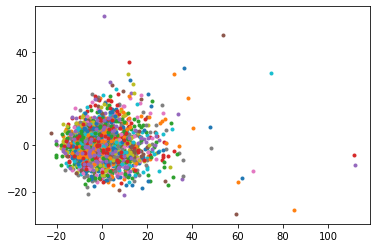

In [52]:
for _, plate_csv in files:
    df = load_pure_zscores(f'{err_fld}/{plate_csv}', False)
    df = df[df.index.isin(['mock'], 1)]

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2'])
    
    plt.plot(principalDf['PC1'], principalDf['PC2'], '.')

In [56]:
raw = True
plates = [load_pure_zscores(plate_csv, raw=raw)for _, plate_csv in files]
all_plates = pd.concat(plates)
all_plates.shape

(13439, 596)

In [60]:
selected_type = all_plates[all_plates.index.isin(['treated'], 1)]
# plates_col = all_plates.index.get_level_values(0)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(selected_type)
principalComponents = np.column_stack((selected_type.index.get_level_values(0).to_numpy(), principalComponents))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Plate', 'PC1', 'PC2'])

In [27]:
pd.concat([df.max() for df in zscores4_ctrl.values()], axis=1).max(axis=1)

AGP_map      69.0
DNA_map      58.0
ER_map       54.0
Mito_map     67.0
RNA_map      57.0
ALL_map     276.0
AGP_raw      44.0
DNA_raw      49.0
ER_raw       45.0
Mito_raw     47.0
RNA_raw      43.0
ALL_raw     197.0
dtype: float64

<AxesSubplot:>

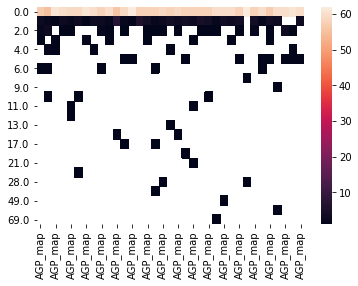

In [32]:
sns.heatmap(pd.concat([df['AGP_map'].value_counts() for df in zscores4_ctrl.values()], axis=1))

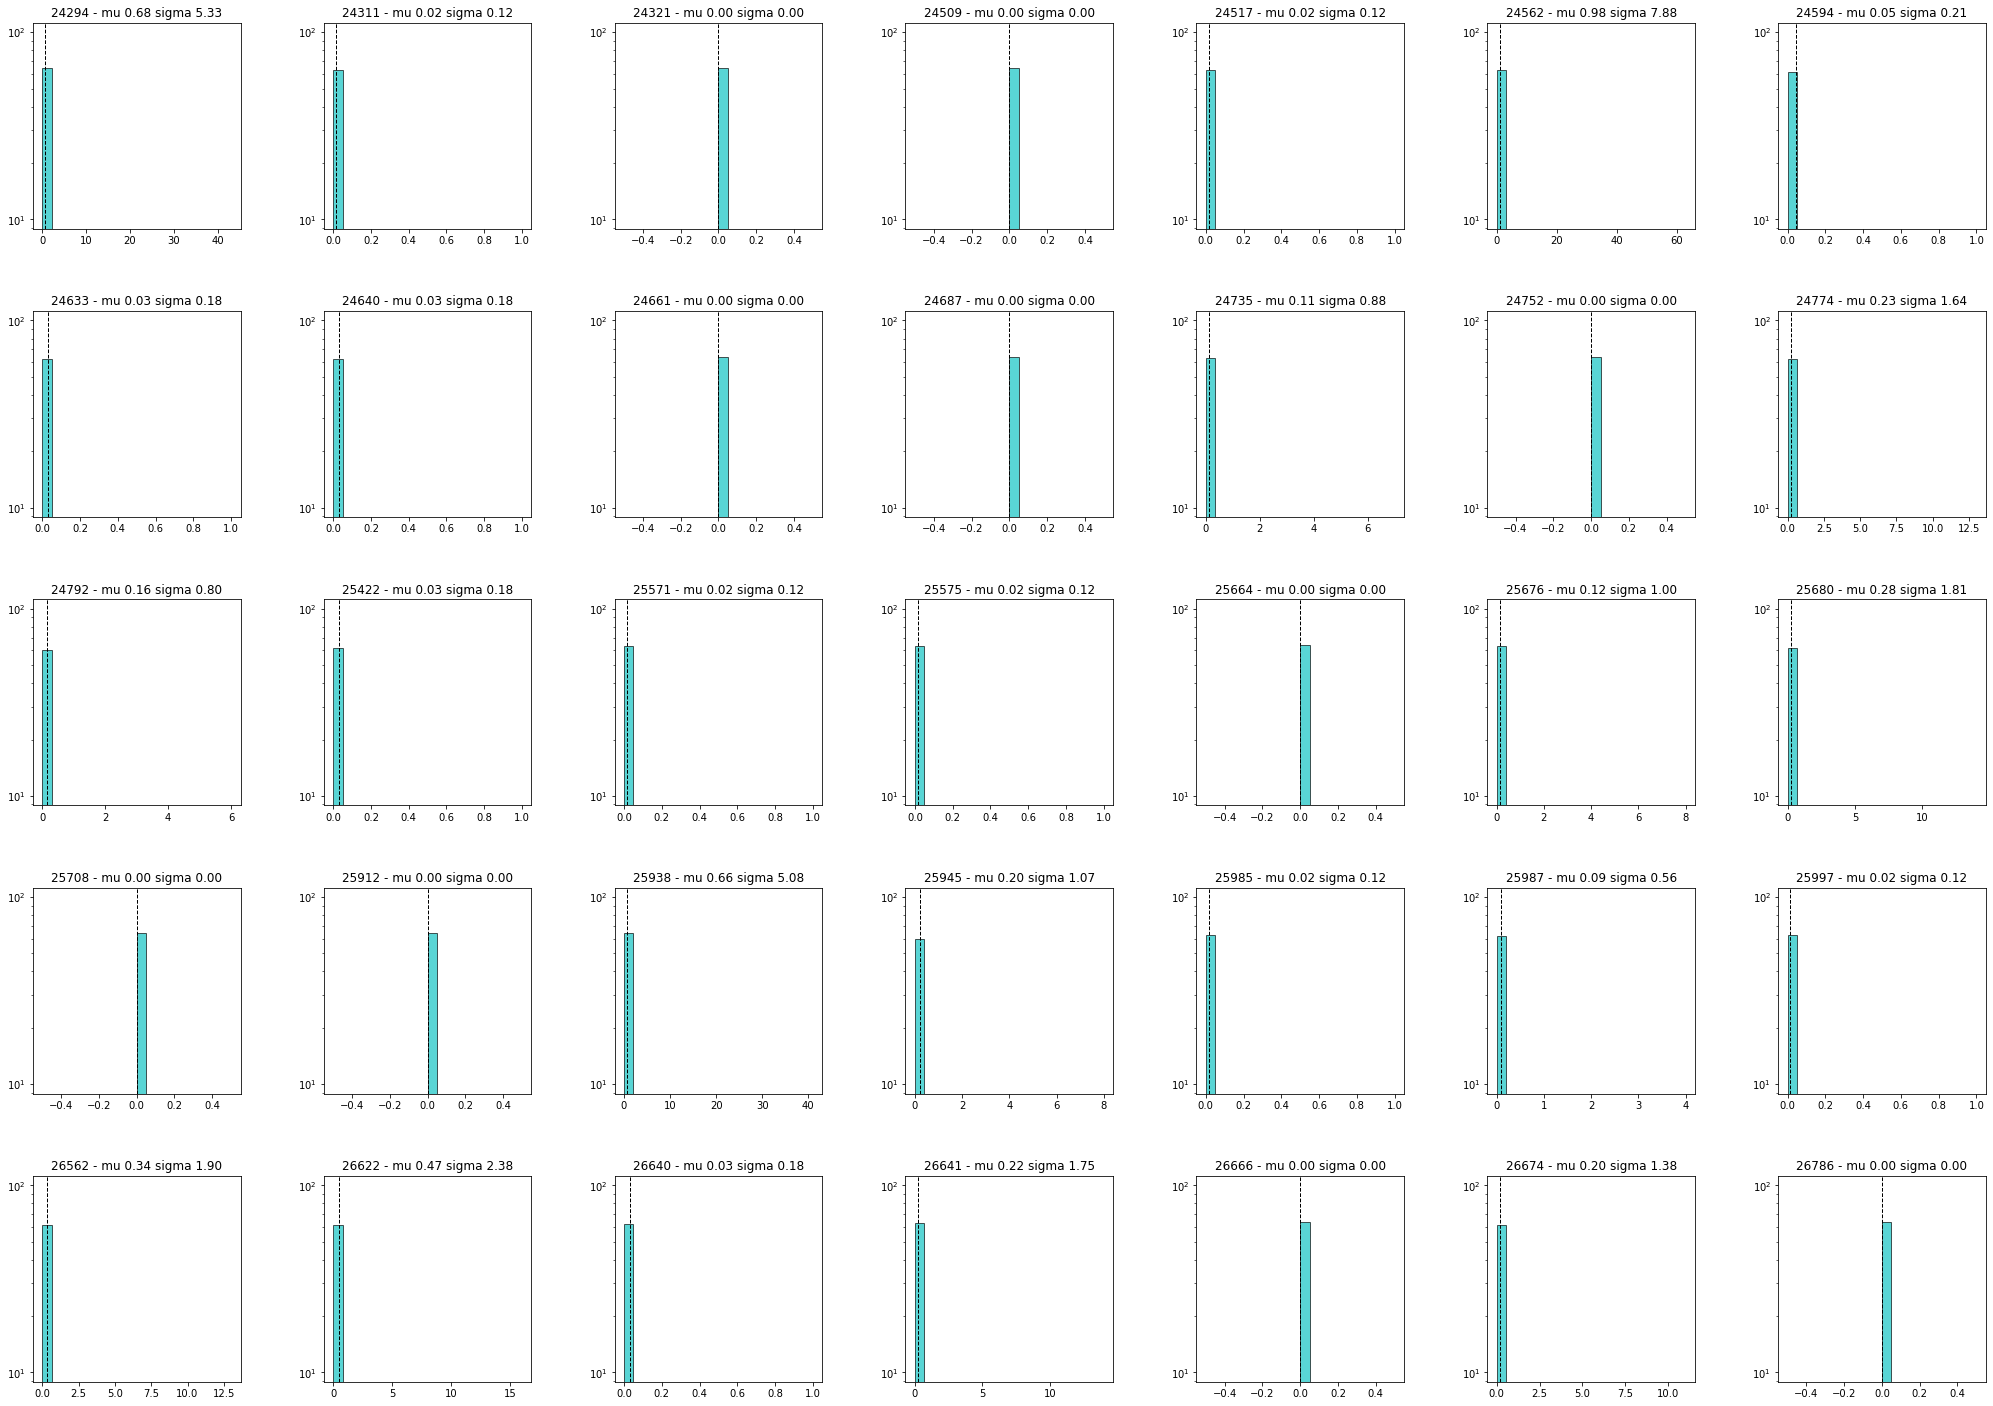

In [66]:
plates_numbers = zscores.keys()

ncol = 7
nrow = len(plates_numbers)//ncol

d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True)#, sharex=True)#, subplot_kw=d)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

lim=500

for i, plate in enumerate(sorted(plates_numbers)):
    curr_df = zscores_ctrl[plate]
#     ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
#     ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
#     ax[i//ncol,i%ncol].set(xlim=(0, lim), ylim=(-1, lim))
    
    col = 'AGP'
#     ax[i//ncol,i%ncol].plot(curr_df[f'{col}_raw'], curr_df[f'{col}_map'], 'r.')#, alpha=0.4)
#     ax[i//ncol,i%ncol].plot(zscores_mock[plate]['ALL_raw'], zscores_mock[plate]['ALL_map'], '.')
#     sns.kdeplot(x=zscores_mock[plate]['ALL_raw'], y=zscores_mock[plate]['ALL_map'], ax=ax[i//ncol,i%ncol], fill=True)
#     sns.kdeplot(x=curr_df['ALL_raw'], y=curr_df['ALL_map'], ax=ax[i//ncol,i%ncol], color='r', fill=True)
    
#     ax[i//ncol,i%ncol].plot(range(-1, lim), range(-1, lim), 'b:')
#     ax[i//ncol,i%ncol].plot(range(-1, 100), [0]*101, 'k:')
#     ax[i//ncol,i%ncol].plot([4]*101, range(-1, 100), 'g:')

        # plot pca individual
#     df = load_pure_zscores(f'{plate}.csv', raw=False)
#     df = df[df.index.isin(['mock'], 1)]

#     from sklearn.decomposition import PCA
#     pca = PCA(n_components=2)
    
#     principalComponents = pca.fit_transform(df)
#     principalDf = pd.DataFrame(data = principalComponents
#                  , columns = ['PC1', 'PC2'])

        # plot pca over all
#     df = principalDf[principalDf['Plate'] == plate]
    
#     ax[i//ncol,i%ncol].plot(df['PC1'], df['PC2'], '.')
#     ax[i//ncol,i%ncol].set_xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}%')
#     ax[i//ncol,i%ncol].set_ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}%')

        # plot zscore distribution
    ax[i//ncol,i%ncol].hist(curr_df[f'{col}_map'], bins=20, color='c', edgecolor='k', alpha=0.65)
    ax[i//ncol,i%ncol].axvline(curr_df[f'{col}_map'].mean(), color='k', linestyle='dashed', linewidth=1)
    ax[i//ncol,i%ncol].set_yscale('log')
    ax[i//ncol,i%ncol].set_title(f"{plate} - mu {curr_df[f'{col}_map'].mean():.2f} sigma {curr_df[f'{col}_map'].std():.2f}")

#     ax[i//ncol,i%ncol].set_title(f'{plate}')
    ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)

In [38]:
all_zscores = pd.concat(zscores.values())
all_zscores.shape
all_zscores_mock = pd.concat(zscores_mock.values())
all_zscores_mock.shape

(2242, 12)

In [39]:
all_zscores_mock.groupby('Plate').mean()

,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,RNA_raw,ALL_raw
Plate,,,,,,,,,,,,
24294,-1.084602e-16,-1.135844e-16,-8.540177e-19,5.294910e-17,8.027766e-17,-2.732857e-17,0.655596,0.735244,0.703650,0.654914,0.679221,0.683811
24311,-6.071532e-17,1.517883e-17,8.760354e-17,5.030698e-17,-6.635317e-17,-6.071532e-18,0.796768,0.804365,0.786762,0.806790,0.814129,0.801662
24321,1.023487e-16,-1.179612e-16,-7.589415e-19,1.717376e-16,7.806256e-17,3.903128e-17,0.784912,0.802350,0.790437,0.804119,0.804967,0.797164
24509,-6.591949e-17,-7.459311e-17,-7.849624e-17,2.385245e-17,4.380177e-17,-1.799776e-17,0.798588,0.783868,0.787202,0.798761,0.803333,0.794755
24517,-2.521854e-16,1.994932e-17,1.734723e-16,2.255141e-16,1.882175e-16,7.459311e-17,0.786008,0.798406,0.787524,0.791285,0.795514,0.791490
24562,-5.377643e-17,-2.255141e-17,9.887924e-17,5.204170e-17,3.469447e-18,-5.204170e-18,0.632611,0.664521,0.712693,0.643888,0.711750,0.673424
24594,1.665335e-16,-8.673617e-17,1.214306e-16,7.979728e-17,-1.387779e-17,7.285839e-17,0.795227,0.820583,0.799398,0.807054,0.813193,0.806570
24633,8.326673e-17,3.469447e-17,8.912142e-17,-1.491862e-16,1.040834e-17,1.040834e-17,0.779138,0.756353,0.777484,0.775805,0.771322,0.772626
24640,5.117434e-17,1.196959e-16,-3.469447e-18,7.070353e-17,1.110223e-16,5.204170e-17,0.786819,0.793910,0.790704,0.815706,0.805093,0.798622


In [44]:
all_zscores.groupby('Plate').mean()

,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,RNA_raw,ALL_raw
Plate,,,,,,,,,,,,
24294,0.234804,0.067021,0.231277,0.239179,0.255966,0.211007,0.921034,1.015661,0.947009,0.931696,0.928955,0.946290
24311,0.353755,0.229868,0.287003,0.449167,0.300355,0.327668,1.466770,1.259729,1.271218,1.458588,1.316018,1.358126
24321,0.486038,0.441763,0.412241,0.496298,0.410248,0.449609,1.416783,1.230627,1.183529,1.357056,1.200271,1.279471
24509,0.029537,-0.181725,-0.018267,-0.024973,0.004410,-0.032657,0.914843,1.002800,0.864290,0.894895,0.899112,0.911802
24517,0.079226,-0.001886,0.045222,0.070846,0.070897,0.054977,0.959663,0.994977,0.906550,0.996181,0.956963,0.961626
24562,0.096677,0.088277,0.054350,0.131405,0.109274,0.096295,0.620228,0.686358,0.700405,0.649937,0.731559,0.677363
24594,-0.041657,-0.051910,-0.053064,-0.011184,-0.018303,-0.034579,0.866925,0.908028,0.879163,0.887246,0.882659,0.883907
24633,-0.093474,-0.088000,-0.032946,-0.043597,-0.029007,-0.056222,0.903624,0.961075,0.875150,0.885789,0.934827,0.910200
24640,0.005165,0.059457,0.037469,-0.049043,0.007278,0.010234,0.977739,0.891638,0.963854,1.067569,0.900175,0.962845


In [43]:
all_zscores.loc[all_zscores['ALL_map'] < all_zscores_mock['ALL_map'].max()].groupby('Plate').mean()

,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,RNA_raw,ALL_raw
Plate,,,,,,,,,,,,
24294,-0.065158,-0.194313,-0.060131,-0.070308,-0.051079,-0.084097,0.712043,0.836171,0.756778,0.720208,0.747675,0.751421
24311,-0.189199,-0.091096,-0.118420,-0.143448,-0.121309,-0.134302,1.065252,1.087007,1.018021,1.072614,1.054391,1.058392
24321,-0.160621,-0.068507,-0.069023,-0.148153,-0.106987,-0.112287,1.009573,0.962438,0.929197,0.979117,0.938153,0.963744
24509,0.013096,-0.215552,-0.039281,-0.048412,-0.011153,-0.054259,0.908974,0.985073,0.853980,0.886072,0.891703,0.902072
24517,0.023646,-0.062806,0.009146,0.016721,0.017719,0.003347,0.929381,0.966504,0.890598,0.969916,0.931033,0.936365
24562,0.096677,0.088277,0.054350,0.131405,0.109274,0.096295,0.620228,0.686358,0.700405,0.649937,0.731559,0.677363
24594,-0.041657,-0.051910,-0.053064,-0.011184,-0.018303,-0.034579,0.866925,0.908028,0.879163,0.887246,0.882659,0.883907
24633,-0.093474,-0.088000,-0.032946,-0.043597,-0.029007,-0.056222,0.903624,0.961075,0.875150,0.885789,0.934827,0.910200
24640,0.005165,0.059457,0.037469,-0.049043,0.007278,0.010234,0.977739,0.891638,0.963854,1.067569,0.900175,0.962845


In [51]:
pd.concat([p.max() for p in zscores_norm_before.values()], axis=1).max(axis=1)

AGP_map          691.832950
DNA_map         1379.116312
ER_map           892.996763
Mito_map        1080.455877
RNA_map          721.763914
ALL_map         2103.901925
AGP_raw          571.018393
DNA_raw          827.557250
ER_raw           677.795157
Mito_raw         674.891953
RNA_raw          559.387344
ALL_raw         1496.232813
AGP_raw1to1      571.018393
DNA_raw1to1      827.557250
ER_raw1to1       677.795157
Mito_raw1to1     674.891953
RNA_raw1to1      559.387344
ALL_raw1to1     1496.232813
dtype: float64

In [52]:
pd.concat([zscores_norm_before[25912].describe().loc[['mean','std']],
zscores_norm_before[24735].describe().loc[['mean','std']]])

,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,RNA_raw,ALL_raw,AGP_raw1to1,DNA_raw1to1,ER_raw1to1,Mito_raw1to1,RNA_raw1to1,ALL_raw1to1
mean,8.821845,7.780434,8.722259,9.762973,9.104353,20.193428,9.326647,8.377661,8.670797,10.652752,9.661265,21.303555,9.326647,8.377661,8.670797,10.652752,9.661265,21.303555
std,3.749933,3.134755,2.565758,5.152086,3.992522,7.601107,3.861264,3.398164,2.585474,5.163060,3.589183,7.613737,3.861264,3.398164,2.585474,5.163060,3.589183,7.613737
mean,13.881662,16.498123,11.756802,12.535155,14.661400,31.477161,10.350991,11.191836,10.352951,10.499448,10.479506,24.455687,10.350991,11.191836,10.352951,10.499448,10.479506,24.455687
std,9.559733,14.695471,8.602444,9.430507,9.660340,23.408144,13.021525,36.150365,9.231832,13.376140,11.430916,42.809623,13.021525,36.150365,9.231832,13.376140,11.430916,42.809623


In [21]:
means=pd.DataFrame({plate_num:StandardScaler().fit(zscores_ctrl[plate_num]).mean_ for plate_num in zscores_ctrl.keys()}, index=zscores_ctrl[25912].columns).T
means

,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,RNA_raw,ALL_raw
24792,0.156250,0.250000,0.093750,0.156250,0.140625,0.796875,0.343750,0.640625,0.546875,0.390625,0.343750,2.265625
25912,0.000000,0.078125,0.000000,0.000000,0.062500,0.140625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24509,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.015625
24633,0.031250,0.046875,0.062500,0.000000,0.046875,0.187500,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625
25987,0.093750,0.406250,0.171875,0.015625,0.031250,0.718750,0.000000,0.125000,0.109375,0.000000,0.000000,0.234375
25680,0.281250,0.234375,0.281250,0.015625,0.062500,0.875000,0.000000,0.140625,0.062500,0.000000,0.000000,0.203125
25422,0.031250,0.015625,0.031250,0.015625,0.015625,0.109375,0.015625,0.000000,0.031250,0.000000,0.000000,0.046875
24517,0.015625,0.015625,0.000000,0.000000,0.015625,0.046875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25664,0.000000,0.140625,0.015625,0.000000,0.000000,0.156250,0.000000,0.046875,0.000000,0.000000,0.000000,0.046875
25575,0.015625,0.015625,0.031250,0.000000,0.000000,0.062500,0.031250,0.015625,0.000000,0.000000,0.000000,0.046875


In [22]:
stds=pd.DataFrame({plate_num:StandardScaler().fit(zscores_ctrl[plate_num]).scale_ for plate_num in zscores_ctrl.keys()}, index=zscores_ctrl[25912].columns).T
stds

,AGP_map,DNA_map,ER_map,Mito_map,RNA_map,ALL_map,AGP_raw,DNA_raw,ER_raw,Mito_raw,RNA_raw,ALL_raw
24792,0.794881,1.984313,0.744118,1.121087,0.555292,5.090370,2.728431,5.084803,4.340686,3.100490,2.728431,17.982841
25912,1.000000,0.407150,1.000000,1.000000,0.496078,0.634113,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
24509,1.000000,1.000000,1.000000,1.000000,0.124020,0.124020,1.000000,0.124020,1.000000,1.000000,1.000000,0.124020
24633,0.173993,0.372059,0.496078,1.000000,0.275550,1.130196,1.000000,1.000000,1.000000,1.000000,0.124020,0.124020
25987,0.551100,2.644090,1.364216,0.124020,0.173993,4.731770,1.000000,0.992157,0.868137,1.000000,1.000000,1.860294
25680,1.798165,1.738733,1.681413,0.124020,0.299739,4.013649,1.000000,1.116176,0.347985,1.000000,1.000000,1.161622
25422,0.173993,0.124020,0.173993,0.124020,0.124020,0.640244,0.124020,1.000000,0.248039,1.000000,1.000000,0.372059
24517,0.124020,0.124020,1.000000,1.000000,0.124020,0.211371,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25664,1.000000,0.997923,0.124020,1.000000,1.000000,1.018865,1.000000,0.372059,1.000000,1.000000,1.000000,0.372059
25575,0.124020,0.124020,0.173993,1.000000,1.000000,0.299739,0.248039,0.124020,1.000000,1.000000,1.000000,0.372059


#### Z-score plate distribution

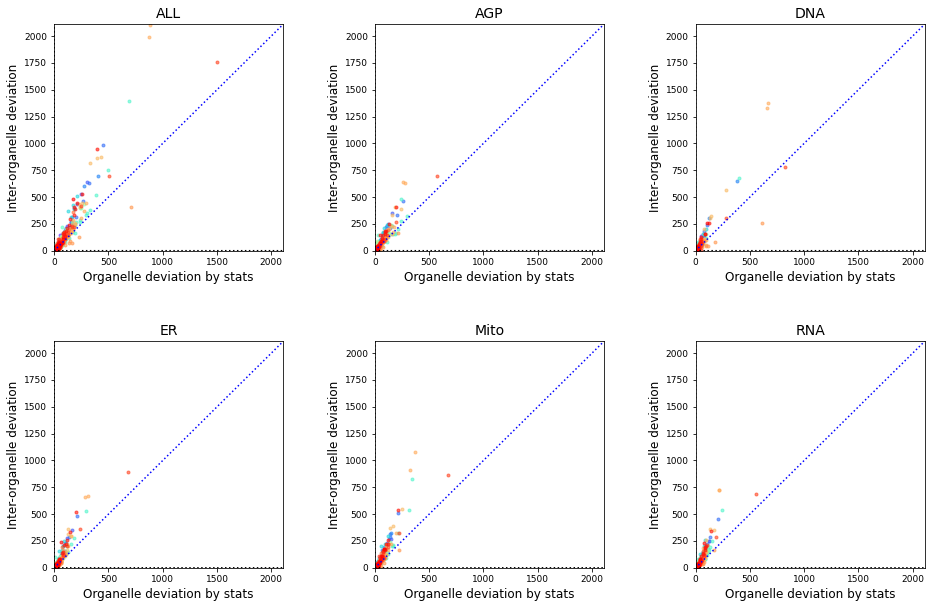

In [55]:
nrow = 2
ncol = 3
# d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
d={'xlabel':"features Fraction-score", 'ylabel':"mapping Fraction-score"}
d={'xlabel':"Organelle deviation by stats", 'ylabel':"Organelle deviation by reconstarct"}
d={'xlabel':"Organelle deviation by reconstarct", 'ylabel':"Inter-organelle deviation"}
d={'xlabel':"Organelle deviation by stats", 'ylabel':"Inter-organelle deviation"}
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5.2,nrow*5), subplot_kw=d, facecolor='#FFFFFF')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)
# fig.suptitle(f'Z-score > {t}', fontsize = 24, y = 0.95)

cols = [col for col in ['ALL'] + CHANNELS]

cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(zscores.keys()))]

for i, col in enumerate(cols):
    ax[i//ncol,i%ncol].set_title(f'{col}')

symbols = []
for (plate_num, plate), color in zip(zscores_norm_before.items(), colors):
#     plate = plate.query('ALL_map > 0.04 or ALL_raw > 0.04')
    for i, col in enumerate(cols):
        s = ax[i//ncol,i%ncol].plot(plate[f'{col}_raw'], plate[f'{col}_map'], f'.', color=color, alpha=0.6)[0]
#         s = ax[i//ncol,i%ncol].plot(means.loc[plate][f'{col}_raw'], stds.loc[plate][f'{col}_raw'], f'r.')[0]

#         sns.heatmap(pd.concat([df[f'{col}_map'].value_counts() for df in zscores_ctrl.values()], axis=1), ax=ax[i//ncol,i%ncol])
    symbols.append(s)
    

# lim=55
lim = 2110
# lim = 20
for i in range(nrow*ncol):
#     ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
#     ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
    ax[i//ncol,i%ncol].set(xlim=(0, lim), ylim=(0, lim))
    ax[i//ncol,i%ncol].plot(range(-lim*2, lim*2), range(-lim*2, lim*2), 'b:')
    ax[i//ncol,i%ncol].plot(range(-lim*2, lim*2), [0]*lim*4, 'k:')
    ax[i//ncol,i%ncol].plot([0]*lim*4, range(-lim*2, lim*2), 'k:')
    ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
    ax[i//ncol,i%ncol].tick_params(axis='both', labelsize = 9)
    ax[i//ncol,i%ncol].yaxis.label.set_size(12)
    ax[i//ncol,i%ncol].xaxis.label.set_size(12)
    ax[i//ncol,i%ncol].title.set_size(14)
    
# ax[0,0].set(xlim=(-1, lim*5), ylim=(-1, lim*5))

# _ = fig.legend(symbols, zscores.keys(), markerscale=1.2, loc='center right')#, fontsize='xx-large')

# _ = fig.savefig(f'{plots_path}/plates_distribution_{t}.eps', format='eps')

## Sample Compounds

In [18]:
def query(cols, th, bigger=True, conj=True):
    eq_op = '>' if bigger else  '<'
    lg_op = 'and' if conj else 'or'
    
    return f'({f"{eq_op}{th} {lg_op} ".join(cols)}{eq_op}{th})' if len(cols) else ''

In [19]:
def query_zscores(query):
    filterd = [plate.query(query) for plate in zscores.values()]
    return pd.concat(filterd)

In [20]:
def query_zscores_(query):
    filterd = [plate.query(query).iloc[:1] for plate_num, plate in zscores.items()]
    return pd.concat(filterd)

In [21]:
cols = CHANNELS+['ALL']
r_cols = [col + '_raw' for col in cols]
m_cols = [col + '_map' for col in cols]
ratio_cols = [m+'/'+r for m, r in zip(m_cols,r_cols)]

### New metric

In [79]:
# raw is significantly lower than map
r_th = 0.4
m_th = 0.5

q_raw = query(r_cols, r_th, bigger=False, conj=True)
q_map = query(m_cols, m_th, bigger=True, conj=True)
raw_low = query_zscores(f'{q_raw} and {q_map}')
raw_low.shape

(1, 12)

In [83]:
# all map high
m_th = 0.4

q_map = query(m_cols, m_th, bigger=True, conj=True)
map_high = query_zscores(f'{q_raw} and {q_map}')
map_high.shape

(4, 12)

In [23]:
# big values in some field and ration high
m_th = 0.5
th = 1.5

q_map = query(m_cols, m_th, bigger=True, conj=False)
q = query(ratio_cols, th, bigger=True, conj=True)
hits = query_zscores(f'{q} and {q_map}')
hits.shape

(23, 12)

In [17]:
# big values in some field and ration low
r_th = 0.5
th = 1

q_raw = query(r_cols, r_th, bigger=True, conj=False)
q = query(ratio_cols, th, bigger=False, conj=True)
neg_hits = query_zscores(f'{q} and {q_raw}')
neg_hits.shape

(12, 12)

In [28]:
# ratio of all fields is big
th = 4

q = query(ratio_cols, th, bigger=True, conj=True)
ratio_high = query_zscores(q)
ratio_high.shape

(24, 12)

In [19]:
# raw and map are correlated
th = 0.3

q_low = query(ratio_cols, 0.8, bigger=True, conj=True)
q_high = query(ratio_cols, 1.2, bigger=False, conj=True)
q_raw = query(r_cols, th, bigger=True, conj=False)
q_map = query(m_cols, th, bigger=True, conj=False)

both_high = query_zscores(f'{q_low} and {q_high} and {q_raw} and {q_map}')
both_high.shape

(11, 12)

In [39]:
# one map_col significant than others

up_th = 0.6
lw_th = 0.4

q = []
for m_col in m_cols:
    others = [col for col in m_cols if col != m_col]
    q.append(f'({m_col}>{up_th} and {query(others, lw_th, bigger=False, conj=True)})')

q = ' or '.join(q)
map_uniq = query_zscores(q)
map_uniq.shape

(8, 12)

In [65]:
l_rng = 0.2
r_rng = 0.4
m_th_h = 0.5
m_th_l = 0.4

q_raw_left = query(r_cols, l_rng, bigger=True, conj=True)
q_raw_right = query(r_cols, r_rng, bigger=False, conj=True)
q_map_high_1 = query(m_cols, m_th_h, bigger=True, conj=False)
q_map_high_2 = query(m_cols, m_th_h, bigger=False, conj=False)
q_map_low_1 = query(m_cols, m_th_l, bigger=True, conj=False)
q_map_low_2 = query(m_cols, m_th_l, bigger=False, conj=False)

pillar = query_zscores(f'{q_raw_left} and {q_raw_right} and {q_map_high_1} and {q_map_high_2} and {q_map_low_1} and {q_map_low_2}')
pillar.shape

(1, 12)

### Old Metric

In [17]:
# raw is significantly lower than map
r_th = 2
m_th = 4

q_raw = query(r_cols, r_th, bigger=False, conj=True)
q_map = query(m_cols, m_th, bigger=True, conj=True)
raw_low = query_zscores(f'{q_raw} and {q_map}')
raw_low.shape

(0, 12)

In [18]:
# big values in some field and ration high
r_th = 2
m_th = 10
th = 1.5
# q_raw = query(r_cols, r_th, bigger=False, conj=True)
q_map = query(m_cols, m_th, bigger=True, conj=False)
q = query(ratio_cols, th, bigger=True, conj=True)
hits = query_zscores(f'{q} and {q_map}')
hits.shape

(36, 12)

In [19]:
# big values in some field and ration low
r_th = 3
m_th = 10
th = 1
q_raw = query(r_cols, r_th, bigger=True, conj=False)
# q_map = query(m_cols, m_th, bigger=True, conj=False)
q = query(ratio_cols, th, bigger=False, conj=True)
neg_hits = query_zscores_(f'{q} and {q_raw}')
neg_hits.shape

(11, 12)

In [20]:
# ratio of all fields is big
th = 2

q = query(ratio_cols, th, bigger=True, conj=True)
ratio_high = query_zscores_(q)
ratio_high.shape

(8, 12)

In [21]:
# raw and map are correlated
th = 5

q_low = query(ratio_cols, 0.8, bigger=True, conj=True)
q_high = query(ratio_cols, 1.2, bigger=False, conj=True)
q_raw = query(r_cols, th, bigger=True, conj=False)
q_map = query(m_cols, th, bigger=True, conj=False)

both_high = query_zscores(f'{q_low} and {q_high} and {q_raw} and {q_map}')
both_high.shape

(5, 12)

In [22]:
# one map_col significant than others

up_th = 4.2
lw_th = 2

q = []
for m_col in m_cols:
    others = [col for col in m_cols if col != m_col]
    q.append(f'({m_col}>{up_th} and {query(others, lw_th, bigger=False, conj=True)})')

q = ' or '.join(q)
map_uniq = query_zscores(q)
map_uniq.shape

(6, 12)

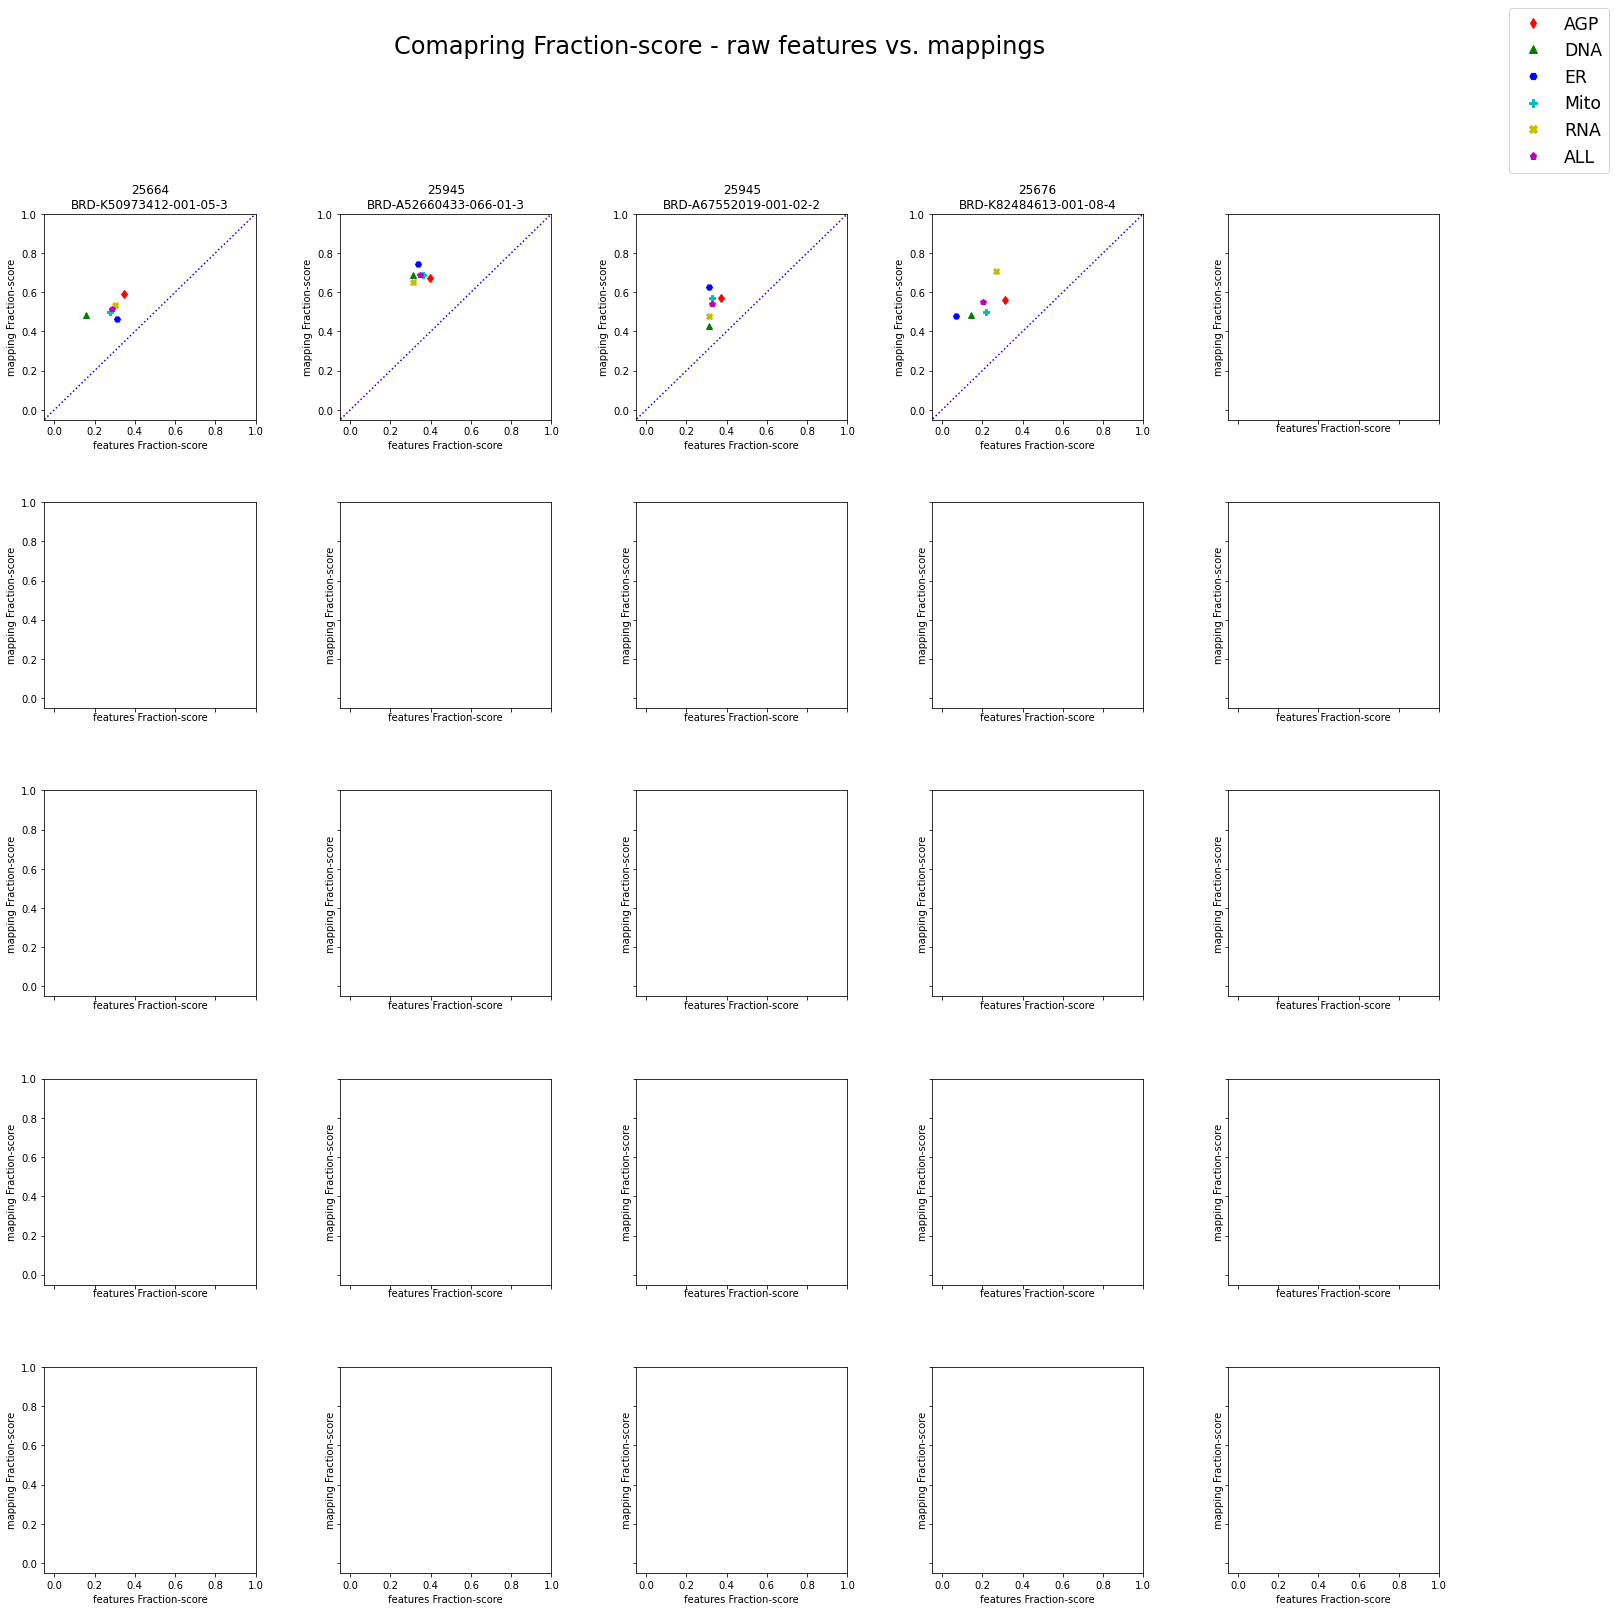

In [84]:
samples = map_high
# samples = pd.concat([raw_low,ratio_high,both_high,map_uniq])
markers = ['d', '^', 'H', 'P', 'X','p']
colors = ['r', 'g', 'b', 'c', 'y', 'm']
n = 5


d={'xlabel':"features Fraction-score", 'ylabel':"mapping Fraction-score"}
fig, ax = plt.subplots(nrows=n, ncols=n, figsize=(n*5,n*5), sharey=True, sharex=True, subplot_kw=d)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle(f'Comapring Fraction-score - raw features vs. mappings', fontsize = 24)

symbols = [0,0,0,0,0,0]
for i, (index, sample) in enumerate(samples.iterrows()):
    if i == n*n:
        break
    cols = [( col+'_raw', col+'_map') for col in CHANNELS + ['ALL']]
    
    for j, (zf_col, zm_col) in enumerate(cols):
        symbols[j] = ax[i//n,i%n].plot(sample[zf_col], sample[zm_col], f'{colors[j]}{markers[j]}')[0]

    ax[i//n,i%n].plot(range(-10, 100),range(-10, 100), 'b:')
    ax[i//n,i%n].set(xlim=(-0.05, 1), ylim=(-0.05, 1))
#     ax[i//n,i%n].set_yscale('symlog')
#     ax[i//n,i%n].set_xscale('symlog')
    ax[i//n,i%n].set_title(f'{index[0]}\n{index[1]}')
    ax[i//n,i%n].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
    
# handles, labels = ax[0,0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
fig.legend(symbols, CHANNELS+["ALL"], markerscale=1.2, fontsize='xx-large')
# fig.savefig(f'{plots_path}/sample_compounds.png')

plt.show()

In [68]:
pillar.index

MultiIndex([(25664, 'BRD-K72344935-001-04-2', 'm05')],
           names=['Plate', 'Metadata_broad_sample', 'Image_Metadata_Well'])

In [115]:
c0 = [(25680, 'BRD-K88133561-001-06-7')] # Correlated
c1 = [(25571, 'BRD-K66760553-001-06-3')] # Similar magnitude to diverse magnitude
c2 = [(26622, 'BRD-K07982814-001-01-1')] # no organelle but reconstruction phenotype
c3 = [(25575, 'BRD-K14096728-001-05-7')] # Amplified
c4 = [(24509, 'BRD-K15876355-001-01-0')] # no organelle but some reconstruction phenotype


c1 = [(25664, 'BRD-K72344935-001-04-2')]
c2 = [(25945, 'BRD-A52660433-066-01-3')]
# c4 = [(25945, 'BRD-A67552019-001-02-2')]
# [(25945, 'BRD-A52660433-066-01-3', 'c02'),
#             (25945, 'BRD-A67552019-001-02-2', 'h07')] # Good to check it later

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


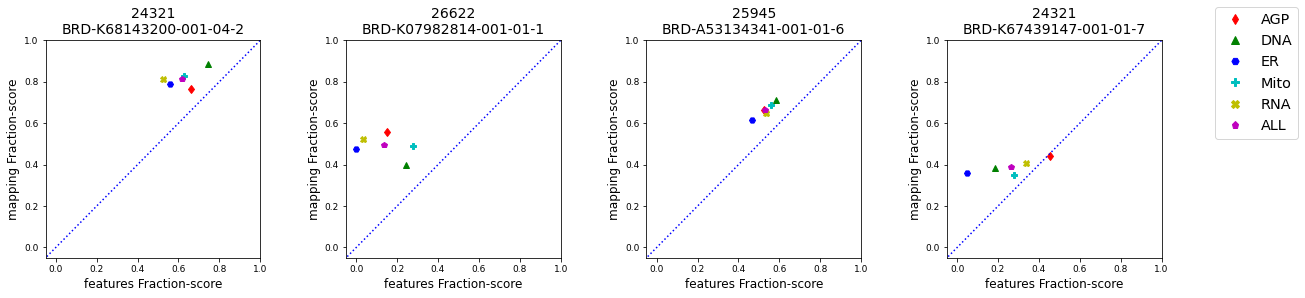

In [117]:
from random import sample

markers = ['d', '^', 'H', 'P', 'X','p']
colors = ['r', 'g', 'b', 'c', 'y', 'm']

c1_1 = [(24321, 'BRD-K68143200-001-04-2')]
c1 = [(26622, 'BRD-K07982814-001-01-1')]
c2 = [(25945, 'BRD-A53134341-001-01-6')]
c3 = [(24321, 'BRD-K67439147-001-01-7')]
samples = c1_1+c1+c2+c3
# samples = c0+c1+c2+c3+c4
d={'xlabel':"features Fraction-score", 'ylabel':"mapping Fraction-score"}
ncols=len(samples)
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols*5,1*4), sharey=True, sharex=True, subplot_kw=d, facecolor='white')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

symbols = [0,0,0,0,0,0]
for i, (plate, compound) in enumerate(samples):
    
    z_scores = zscores[plate][zscores[plate].index.isin([compound], 1)]
    
    for j, (zf_col, zm_col) in enumerate(cols):
        symbols[j] = ax[i].plot(z_scores[zf_col], z_scores[zm_col], f'{colors[j]}{markers[j]}')[0]

    ax[i].plot(range(-10, 150),range(-10, 150), 'b:')
#     ax[i].set(xlim=(0, 55), ylim=(0, 55))
    ax[i].set(xlim=(-0.05, 1), ylim=(-0.05, 1))
#     ax[i].set_yscale('symlog')
#     ax[i].set_xscale('symlog')
    ax[i].set_title(f'{plate}\n{compound}', )
    ax[i].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
    ax[i].tick_params(axis='both', labelsize = 9)
    ax[i].yaxis.label.set_size(12)
    ax[i].xaxis.label.set_size(12)
    ax[i].title.set_size(14)
    
# handles, labels = ax[0,0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
fig.legend(symbols, CHANNELS+["ALL"], markerscale=1.2, fontsize='x-large')
fig.savefig(f'{plots_path}/old_with_new_metric.eps')

plt.show()

### Plot by feature

In [84]:
ind = map_features[cols].mean(axis=1).where(lambda x: x>5).dropna().index
raw_features.loc[ind,cols].filter(regex=f'Cells_{family}')

Cells_Texture_AngularSecondMoment_RNA_10_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                               
24661 BRD-K51052187-001-01-7 a24                                                   13.070373   
      BRD-K72872827-001-01-9 p21                                                   -0.020486   

                                                  Cells_Texture_AngularSecondMoment_RNA_3_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                              
24661 BRD-K51052187-001-01-7 a24                                                   5.145335   
      BRD-K72872827-001-01-9 p21                                                  -2.769739   

                                                  Cells_Texture_AngularSecondMoment_RNA_5_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                              
24661 BRD-K51052187-001-01-7 a24                                                   7.561981   
      BRD-K72872827-001-01-9 p21                                                  -2.133803   

                                                  Cells_Texture_Contrast_RNA_10_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                    
24661 BRD-K51052187-001-01-7 a24                                        -3.470467   
      BRD-K72872827-001-01-9 p21                                         3.985185   

                                                  Cells_Texture_Contrast_RNA_3_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                   
24661 BRD-K51052187-001-01-7 a24                                       10.849123   
      BRD-K72872827-001-01-9 p21                                       10.007049   

                                                  Cells_Texture_Contrast_RNA_5_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                   
24661 BRD-K51052187-001-01-7 a24                                        4.645055   
      BRD-K72872827-001-01-9 p21                                        8.223705   

                                                  Cells_Texture_DifferenceEntropy_RNA_10_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                             
24661 BRD-K51052187-001-01-7 a24                                                 -5.902598   
      BRD-K72872827-001-01-9 p21                                                  2.889971   

                                                  Cells_Texture_DifferenceEntropy_RNA_3_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                            
24661 BRD-K51052187-001-01-7 a24                                                 5.541973   
      BRD-K72872827-001-01-9 p21                                                 6.485199   

                                                  Cells_Texture_DifferenceEntropy_RNA_5_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                            
24661 BRD-K51052187-001-01-7 a24                                                 1.919357   
      BRD-K72872827-001-01-9 p21                                                 5.618586   

                                                  Cells_Texture_DifferenceVariance_RNA_10_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                                              
24661 BRD-K51052187-001-01-7 a24                                                  -3.246672   
      BRD-K72872827-001-01-9 p21                                                   3.117852   

                                                  ...  \
Plate Metadata_broad_sample  Image_Metadata_Well  ...   
24661 BRD-K51052187-001-01-7 a24                  ...   
      BRD-K72872827-001-01-9 p21                  ...   

                                                  Cells_Texture_SumAverage_RNA_5_0  \
Plate Metadata_broad_sample  Image_Metadata_Well                     

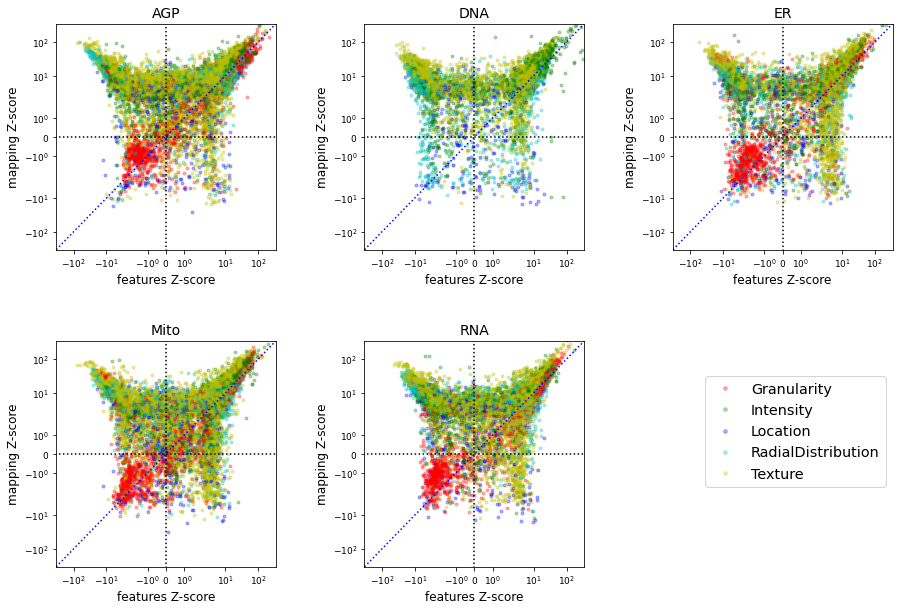

In [90]:
thresh = 5

colors = ['r', 'g', 'b', 'c', 'y', 'm']
nrow = 2
ncol = 3
d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

for p in zscores_raw.keys():
    raw_features = zscores_raw[p]
    map_features = zscores_err[p]
    symbols = []
    for i, (chan, cols) in enumerate(ch_dict.items()):
        for j, family in enumerate(FAMILIES):
            crit_ind = map_features[cols].mean(axis=1).where(lambda x: x>thresh).dropna().index
            sym = ax[i//ncol,i%ncol].plot(
                raw_features.loc[crit_ind,cols].filter(regex=f'Cells_{family}').values.reshape(-1), 
                map_features.loc[crit_ind,cols].filter(regex=f'Cells_{family}').values.reshape(-1), 
                f'{colors[j]}.', alpha=0.3)
            if len(symbols) < len(FAMILIES):
                symbols.append(sym[0])
        ax[i//ncol,i%ncol].set_title(f'{chan}')


for i in range(nrow*ncol):
    ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
    ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
    ax[i//ncol,i%ncol].set(xlim=(-350, 350), ylim=(-350, 350))
    ax[i//ncol,i%ncol].plot(range(-500, 500), range(-500, 500), 'b:')
    ax[i//ncol,i%ncol].plot(range(-500, 500), list(map(lambda x: 0, range(-500, 500))), 'k:')
    ax[i//ncol,i%ncol].plot(list(map(lambda x: 0, range(-500, 500))), range(-500, 500), 'k:')
    ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
    ax[i//ncol,i%ncol].tick_params(axis='both', labelsize = 9)
    ax[i//ncol,i%ncol].yaxis.label.set_size(12)
    ax[i//ncol,i%ncol].xaxis.label.set_size(12)
    ax[i//ncol,i%ncol].title.set_size(14)

fig.delaxes(ax[-1,-1])
fig.legend(symbols, FAMILIES, markerscale=1.2, fontsize='x-large', bbox_to_anchor=(0.9, 0.4))

In [256]:
samples = zscores[25708].query('ALL_map > 20')
samples

AGP_map    DNA_map  \
Plate Metadata_broad_sample  Image_Metadata_Well                         
25708 BRD-K05556515-001-07-4 g15                  27.604023  40.451548   
      BRD-K61415887-001-06-6 f06                  28.965204  26.793280   
      BRD-K80622725-001-13-6 i17                  32.683774  26.969491   

                                                     ER_map   Mito_map  \
Plate Metadata_broad_sample  Image_Metadata_Well                         
25708 BRD-K05556515-001-07-4 g15                  24.297438  29.953936   
      BRD-K61415887-001-06-6 f06                  22.902518  39.067378   
      BRD-K80622725-001-13-6 i17                  27.512689  28.002842   

                                                    RNA_map    ALL_map  \
Plate Metadata_broad_sample  Image_Metadata_Well                         
25708 BRD-K05556515-001-07-4 g15                  19.233943  27.838869   
      BRD-K61415887-001-06-6 f06                  26.026032  28.826538   
      BRD-K80622725-001-13-6 i17                  25.210171  28.118549   

                                                    AGP_raw    DNA_raw  \
Plate Metadata_broad_sample  Image_Metadata_Well                         
25708 BRD-K05556515-001-07-4 g15                  10.782322  15.832068   
      BRD-K61415887-001-06-6 f06                  14.968751  11.504370   
      BRD-K80622725-001-13-6 i17                  12.505476   8.555339   

                                                     ER_raw   Mito_raw  \
Plate Metadata_broad_sample  Image_Metadata_Well                         
25708 BRD-K05556515-001-07-4 g15                   9.923473  12.088465   
      BRD-K61415887-001-06-6 f06                  12.003869  18.212441   
      BRD-K80622725-001-13-6 i17                   9.315714  10.006911   

                                                    RNA_raw    ALL_raw  
Plate Metadata_broad_sample  Image_Metadata_Well                        
25708 BRD-K05556515-001-07-4 g15                   6.565499  10.853101  
      BRD-K61415887-001-06-6 f06                  11.441070  13.708099  
      BRD-K80622725-001-13-6 i17                   8.313433   9.785135

In [57]:
def create_plot_by_feature(raw_features, map_features, chan_dict):
    colors = ['r', 'g', 'b', 'c', 'y', 'm']
    nrow = 2
    ncol = 3
    d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
    fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

    symbols = []
    for i, (chan, cols) in enumerate(chan_dict.items()):
        for j, family in enumerate(FAMILIES):
            sym = ax[i//ncol,i%ncol].plot(raw_features[cols].filter(regex=f'Cells_{family}'), 
                                    map_features[cols].filter(regex=f'Cells_{family}'), 
                                    f'{colors[j]}.')
            if len(symbols) < len(FAMILIES):
                symbols.append(sym[0])
        ax[i//ncol,i%ncol].set_title(f'{chan}')


    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
        ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
        ax[i//ncol,i%ncol].set(xlim=(-350, 350), ylim=(-350, 350))
        ax[i//ncol,i%ncol].plot(range(-500, 500), range(-500, 500), 'b:')
        ax[i//ncol,i%ncol].plot(range(-500, 500), list(map(lambda x: 0, range(-500, 500))), 'k:')
        ax[i//ncol,i%ncol].plot(list(map(lambda x: 0, range(-500, 500))), range(-500, 500), 'k:')
        ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=False, left=True, right=False)
        ax[i//ncol,i%ncol].tick_params(axis='both', labelsize = 9)
        ax[i//ncol,i%ncol].yaxis.label.set_size(12)
        ax[i//ncol,i%ncol].xaxis.label.set_size(12)
        ax[i//ncol,i%ncol].title.set_size(14)

    fig.delaxes(ax[-1,-1])
#     fig.legend(symbols, FAMILIES, markerscale=1.2, fontsize='x-large', bbox_to_anchor=(0.9, 0.4))

In [274]:
plate = 25708
q = 'ALL_map > 20'

map_by_feat = extract_z_score(f'{err_fld}/{plate}.csv', by_well=True, by_channel=False)
raw_by_feat = extract_z_score(f'{raw_fld}/{plate}.csv', by_well=True, by_channel=False)
_, _, chan_dict = list_columns(raw_by_feat)

In [300]:
map_by_feat = zscores_err[plate]
raw_by_feat = zscores_raw[plate]

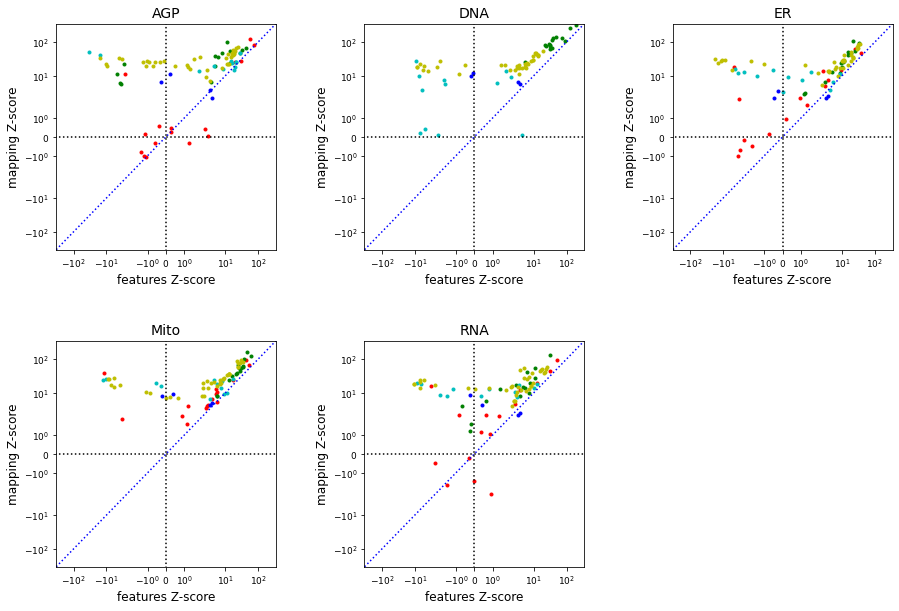

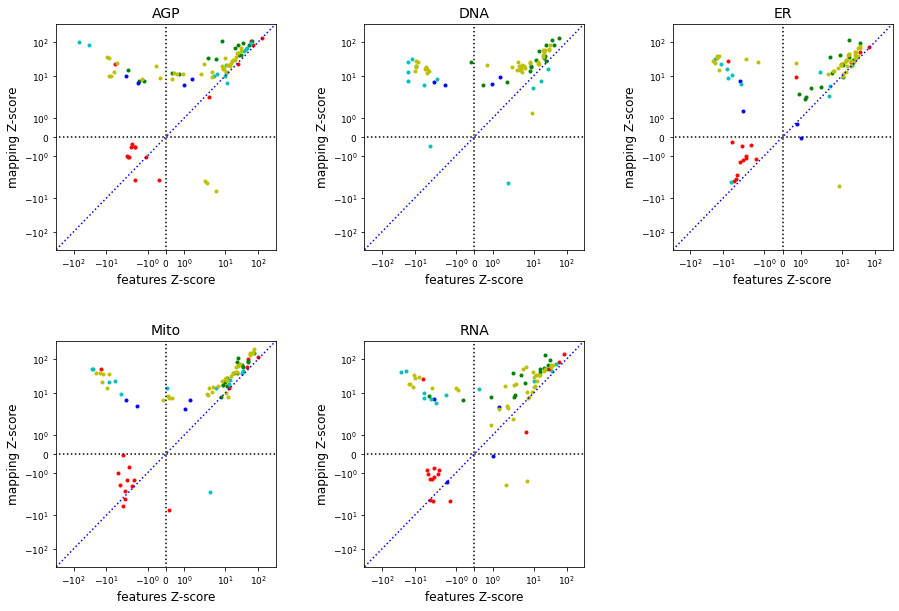

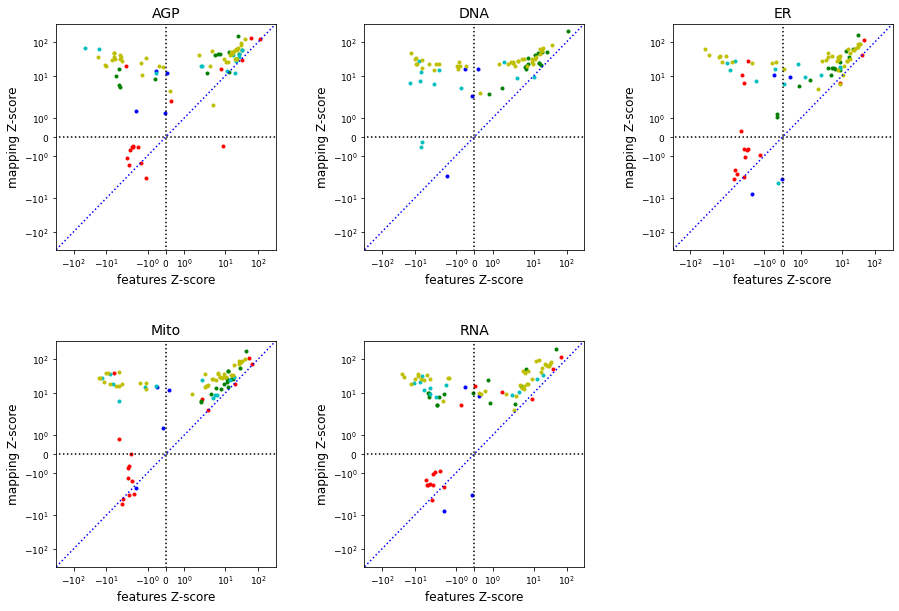

In [307]:
for compound, _ in zscores[plate].query(q).groupby('Metadata_broad_sample'):
    compund_map = map_by_feat[map_by_feat.index.get_level_values(1) == compound]
    compund_raw = raw_by_feat[raw_by_feat.index.get_level_values(1) == compound]
    create_plot_by_feature(compund_raw, compund_map, chan_dict)

In [32]:
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

# handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]

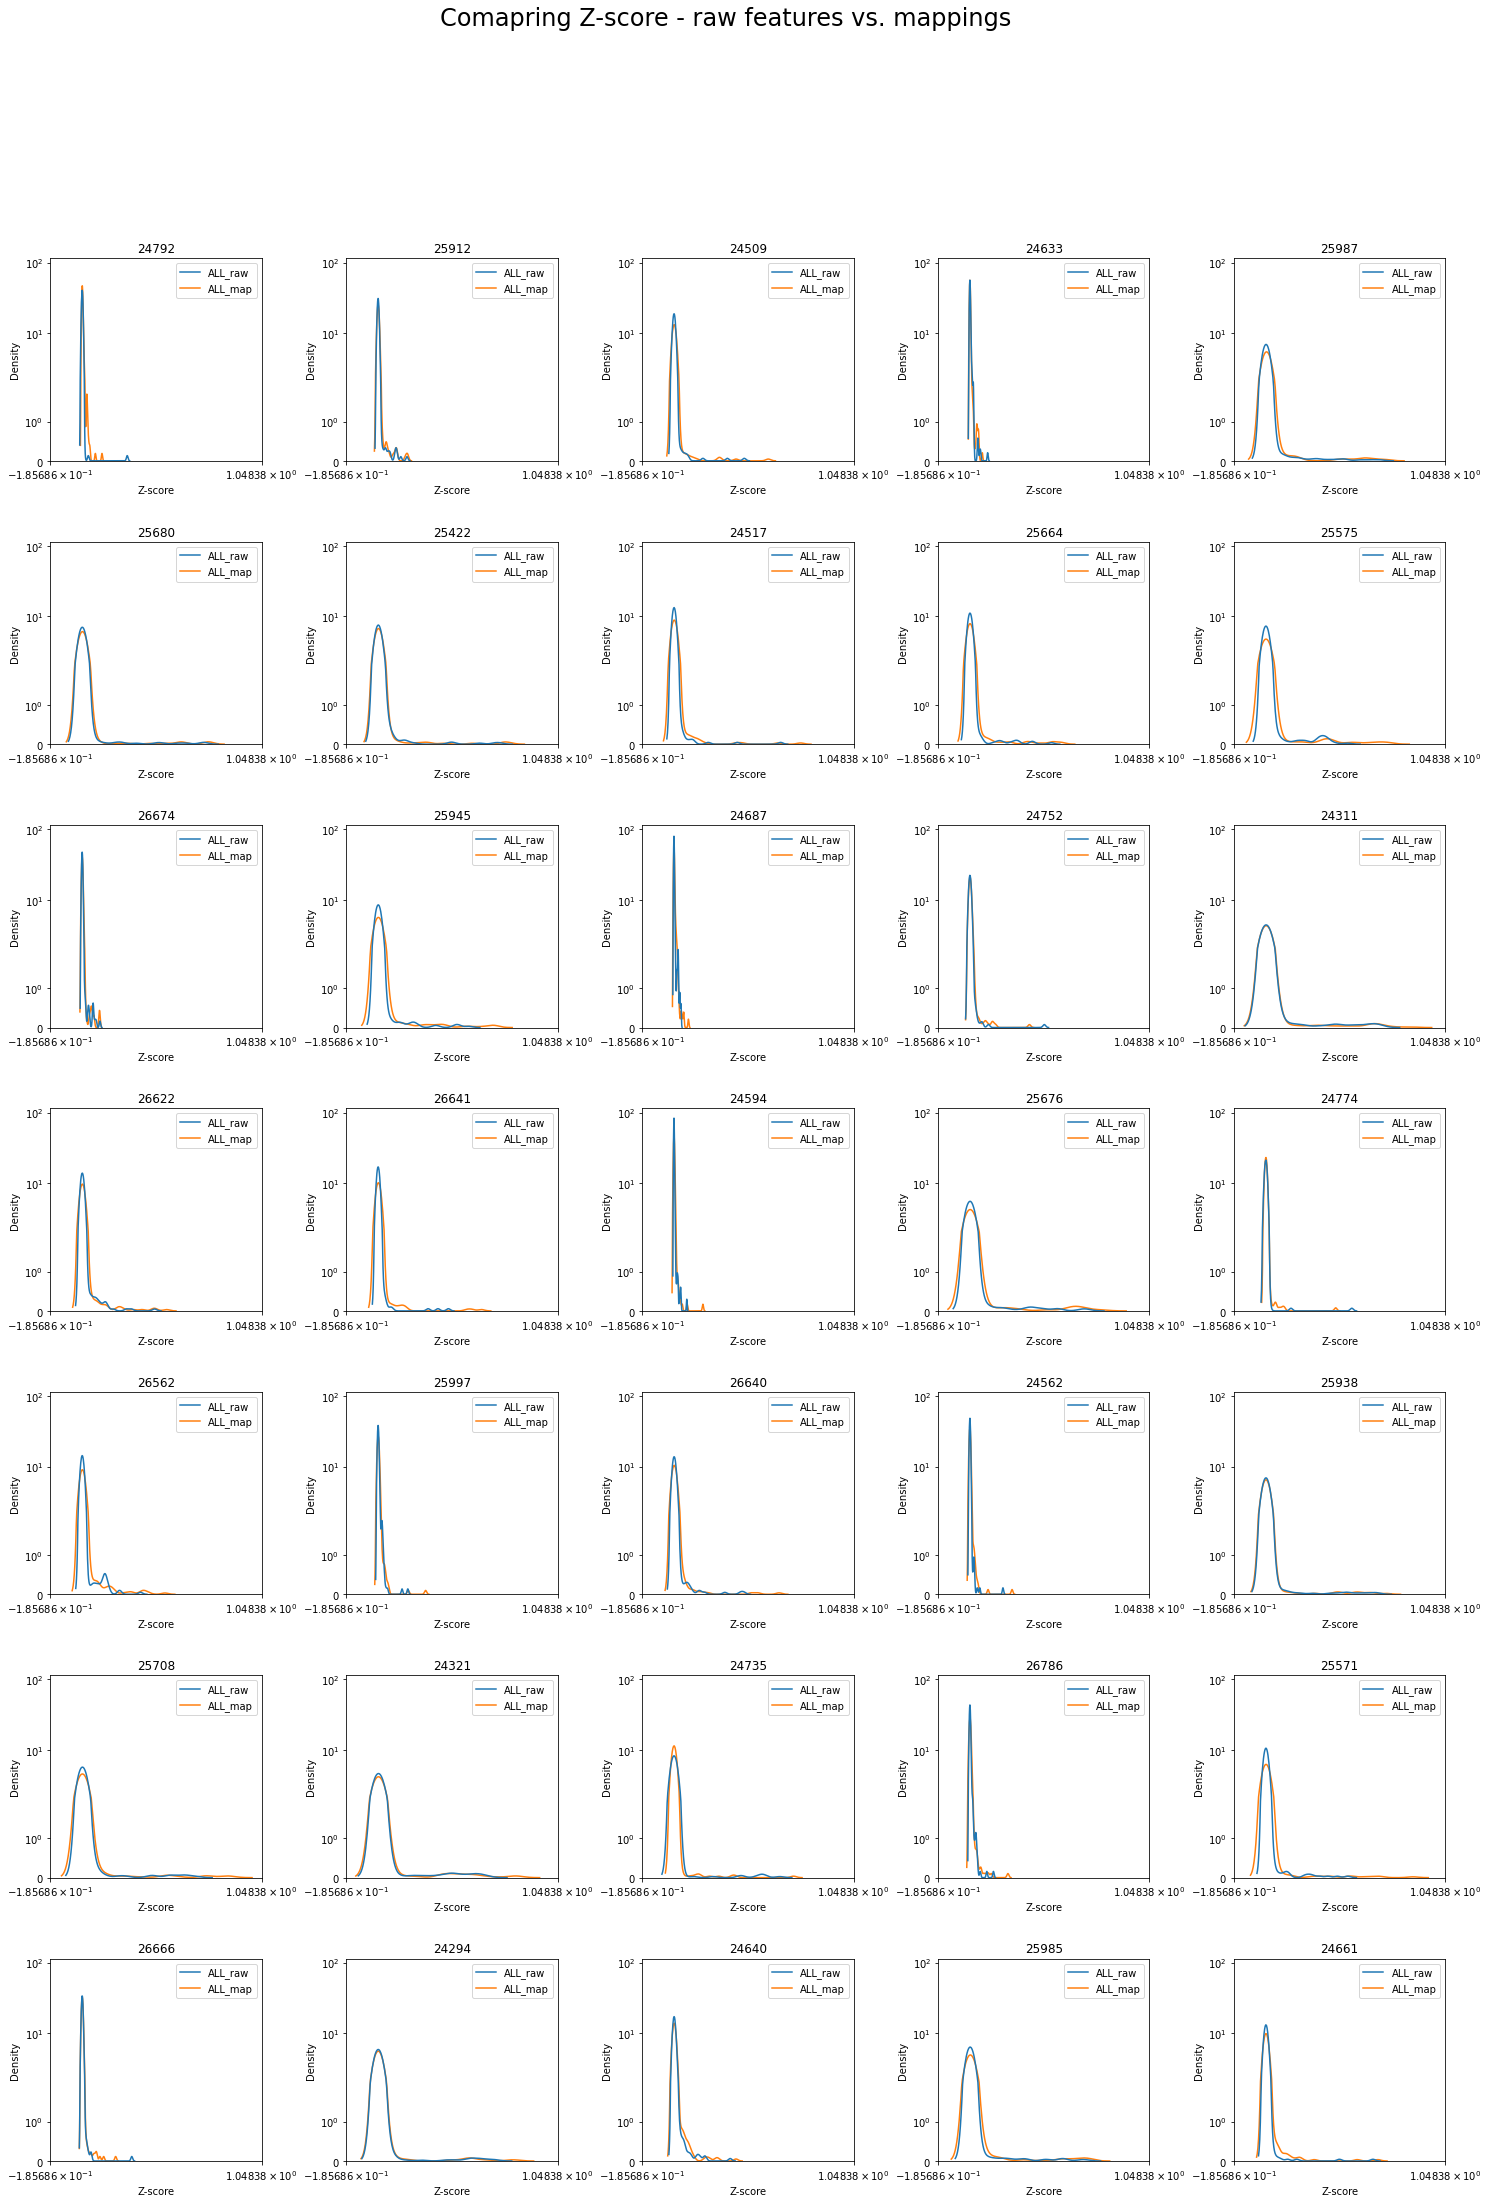

In [41]:
plates_numbers = zscores.keys()

ncol = 5
nrow = len(plates_numbers)//ncol

d={'xlabel':"Z-score", 'ylabel':"Density"}
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

for i, plate in enumerate(plates_numbers):
    curr_df = zscores[plate]
    ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
    ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
#     ax[i//ncol,i%ncol].plot(curr_df['ALL'], curr_df['RMSE'], f'mp', markeredgecolor=(0, 0, 0, 0.2))
    sns.kdeplot(data=curr_df[['ALL_raw','ALL_map']], ax=ax[i//ncol,i%ncol])
#     ax[i//ncol,i%ncol].plot(range(-1, 100), range(-1, 100), 'b:')

    ax[i//ncol,i%ncol].set_title(f'{plate}')
    ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
#     ax[i//ncol,i%ncol].grid()

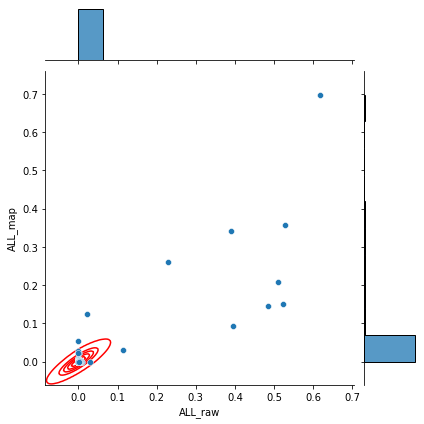

In [42]:
# ax = sns.kdeplot(data=curr_df, x="ALL", y="RMSE")
# ax.set_yscale('symlog', base=10)
# ax.set_xscale('symlog', base=10)

# sns.set_theme(style="ticks")
curr_df = zscores[24735]
g = sns.jointplot(
    data=curr_df,
    x="ALL_raw", y="ALL_map"
#     ,kind="kde",
)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

# g.ax_joint.set_yscale('symlog', base=10)
# g.ax_joint.set_xscale('symlog', base=10)